# <u> UCI Automobile Data Set </u>

## Section 1: Data Loading

There are many attributes in the automotive data set provided by the UCI Machine Learning Repository. This data set has twenty six different attributes. It is a very rich range of information which can be used to study different aspects of automotive in general. However, we will use some of the attributes that are more relevent as per our infromation need related to <b> automobile gas mileage </b> in the comming sections. 

The data set that we have comprises 205 rows and 26 variables.

- UCI's explanation about the data set is as follows: 

- > This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

- > The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

All of the entities mentioned above may be very important while dealing with the analytics of automotive in general, but because we are only interested in the data sets that are composed of information in relation to "automobile gas mileage". I have selected following few attributes that I believe are more relevent to the information need of this project: 

- make
- fuel-type: diesel, gas
- aspiration: std, turbo
- drive-wheels: 4wd, fwd, rwd.
- curb-weight: continuous from 1488 to 4066. (might be impacted by length, width, height)
- engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
- num-of-cylinders: eight, five, four, six, three, twelve, two.
- engine-size: continuous from 61 to 326.
- horsepower: continuous from 48 to 288. (bore, stroke, compression ratio: impact, y, n ?)
- city-mpg
- highway-mpg

We will be analyzing these attributes using various plotting techniques in the EDA and Data Summary Section.

### Data Loading

In [420]:
# bunch of import statememts that are going to be used throught the project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [422]:
# uploading data to pandas

df = pd.read_csv('https://raw.githubusercontent.com/kuinkelarun/Quiz-Assignment-2/main/imports-85.csv', header=None)
#prints few lines of the sample table including the deader 
df.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, the given data does not provide any column names, next task is to assign some meaningful names for the columns. The header will be based on the information available provided in the UCI Repository.

In [423]:
# assigning column names 

df.columns = ['Symbol', 'Normalized Loss', 'Make', 'Fuel-Type', 'Aspiration', 'Num Doors', 'Body Style', 'Drive-Wheels', 'Engine Location', 'Wheel Base', 'Length', 'Width', 'Height', 'Curb Weight', 'Engine Type', 'Num-Cylinders', 'Engine Size', 'Fuel System', 'Bore', 'Stroke', 'Compression-Ratio', 'Horsepower', 'Peak-RPM', 'City-MPG', 'Highway-MPG', 'Price']

# print size of the data set
print(df.shape)

# print head again to see if column names are properly applied
df.head()

(205, 26)


,Symbol,Normalized Loss,Make,Fuel-Type,Aspiration,Num Doors,Body Style,Drive-Wheels,Engine Location,Wheel Base,...,Engine Size,Fuel System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-RPM,City-MPG,Highway-MPG,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Section 2: Exploratory Data Analysis (EDA)

In this section we will be conducting data summary on the number of use cases. The data set contains 205 rows, which means that there will be 205 use cases for the analysis and also for each of the attributes, unless there are any invalid or missing values. We will be finding out any NaN values, zeroes, missing values or errors and take appropriate actions depending on the nature of the attribute. We might aswell create different subset of data, which will help us analyze them in a way that serves the purpose of this project.

In [424]:
# generating a general information of data set, along with the 
# information about data type of each columns

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             205 non-null    int64  
 1   Normalized Loss    205 non-null    object 
 2   Make               205 non-null    object 
 3   Fuel-Type          205 non-null    object 
 4   Aspiration         205 non-null    object 
 5   Num Doors          205 non-null    object 
 6   Body Style         205 non-null    object 
 7   Drive-Wheels       205 non-null    object 
 8   Engine Location    205 non-null    object 
 9   Wheel Base         205 non-null    float64
 10  Length             205 non-null    float64
 11  Width              205 non-null    float64
 12  Height             205 non-null    float64
 13  Curb Weight        205 non-null    int64  
 14  Engine Type        205 non-null    object 
 15  Num-Cylinders      205 non-null    object 
 16  Engine Size        205 non

This general information is useful to check if all the data types are what we expect them to be. In case we need to make some changes, we can do so before we move on to analyze those data. 

In [425]:
df.describe()

,Symbol,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Compression-Ratio,City-MPG,Highway-MPG
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


This is a preliminary analysis of the given data set that is generated before analyzing any factors within the dataset. We have not checked for any NaNs, empty fields, Nulls, wrong entries, and outliers at this point.

Summary statistics includes only the numerical variables. None of the values are negative, which is a positive side, besides the Symbol which is meant to have negative value. The median values are higher than the mean values on Symbol and Height. Since median value are higher than the mean values, this tells us that the distribution are left skewed. For WHeel Base, Length, Width, Curb Weight, Engine Size, Compression Ratio, City-MPG, Highway-MPG, the median values are less than the mean values, making the distribution right skewed. We will further analyze the summary when we have created the subset of the original data. 

The general information we obtain from the entire data set may not be as relevent to us. Because, we are interested in features or the attributes that may impact automobile gas mileage, the above generated general description may or may allign with our information need and analytics. 

Which is why, we are going to create a subset of the original dataset as we have identified in the section 1 of this project, assuming that these features will give us more precious answers to our automobile gas mileage query. 

### Creating Subset of the Original Data 

We will be using the attributes that we slice from the original data, and use them to further analyze.  

In [204]:
# subset of columns that we will be using
new_df = df[['Make', 'Fuel-Type', 'Aspiration', 'Drive-Wheels', 'Curb Weight', 'Engine Type', 'Num-Cylinders', 'Engine Size', 'Horsepower', 'City-MPG', 'Highway-MPG']]
new_df.head()

,Make,Fuel-Type,Aspiration,Drive-Wheels,Curb Weight,Engine Type,Num-Cylinders,Engine Size,Horsepower,City-MPG,Highway-MPG
0,alfa-romero,gas,std,rwd,2548,dohc,four,130,111,21,27
1,alfa-romero,gas,std,rwd,2548,dohc,four,130,111,21,27
2,alfa-romero,gas,std,rwd,2823,ohcv,six,152,154,19,26
3,audi,gas,std,fwd,2337,ohc,four,109,102,24,30
4,audi,gas,std,4wd,2824,ohc,five,136,115,18,22


It is important to check the data types of each of these variables, to make sure that we have the right data type and correct them if necessary. 

### Checking for Nulls and Data Types

In [116]:
# checking for null values

new_df.columns[new_df.isnull().any()]


Index([], dtype='object')

In [117]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           205 non-null    object
 1   Fuel-Type      205 non-null    object
 2   Aspiration     205 non-null    object
 3   Drive-Wheels   205 non-null    object
 4   Curb Weight    205 non-null    int64 
 5   Engine Type    205 non-null    object
 6   Num-Cylinders  205 non-null    object
 7   Engine Size    205 non-null    int64 
 8   Horsepower     205 non-null    object
 9   City-MPG       205 non-null    int64 
 10  Highway-MPG    205 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 17.7+ KB


Looking at the data type for Horsepower, the information indicates it as an object. But, Horsepower should really be an integer. We will now convert this column into a numerical value. 

Before trying to change the values to integer, first make sure that there are not any non numeric values using following code. 

### Checking for Unique Values

In [118]:
new_df['Horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

### Handling "?" in Column "Horsepower"

As we can see, there is a "?" value that should not be there. Lets now find the index of that value and look for imputation options to either drop the row or to replace the value.

In [119]:
# locating the index of '?' character 

new_df.loc[new_df['Horsepower']=='?']

# next method to do the same
# new_df.index[(new_df['Horsepower'] == '?')]


,Make,Fuel-Type,Aspiration,Drive-Wheels,Curb Weight,Engine Type,Num-Cylinders,Engine Size,Horsepower,City-MPG,Highway-MPG
130,renault,gas,std,fwd,2579,ohc,four,132,?,23,31
131,renault,gas,std,fwd,2460,ohc,four,132,?,23,31


In [120]:
# removing the rows with "?" in Horsepower

new_df = new_df.loc[~(new_df['Horsepower'] == '?')]

In [121]:
new_df.loc[new_df['Horsepower']=='?']

,Make,Fuel-Type,Aspiration,Drive-Wheels,Curb Weight,Engine Type,Num-Cylinders,Engine Size,Horsepower,City-MPG,Highway-MPG


The rows with '?' has been removed, now we can proceed to convert the 'Horsepower' column to integer. 

In [122]:
# converting the column Horsepower into numeric
new_df['Horsepower'] = pd.to_numeric(new_df['Horsepower'])

In [123]:
#check each categorical value
# code from professor

vals = new_df[['Make', 'Fuel-Type', 'Aspiration', 'Drive-Wheels', 'Engine Type', 'Num-Cylinders' ]].copy()
for x in range(len(vals.columns)):
    print(vals.columns[x] + ":")
    print(vals[vals.columns[x]].unique())
    print("")


# to check individualy, as follows
# new_df['Highway-MPG'].unique()    

Make:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']

Fuel-Type:
['gas' 'diesel']

Aspiration:
['std' 'turbo']

Drive-Wheels:
['rwd' 'fwd' '4wd']

Engine Type:
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

Num-Cylinders:
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']



### Run Descriptive Statistics for "new_df"

In [124]:
new_df.describe()

,Curb Weight,Engine Size,Horsepower,City-MPG,Highway-MPG
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,2555.921182,126.857143,104.256158,25.241379,30.748768
std,523.205555,41.845239,39.714369,6.570702,6.920406
min,1488.000000,61.000000,48.000000,13.000000,16.000000
25%,2145.000000,97.000000,70.000000,19.000000,25.000000
50%,2414.000000,119.000000,95.000000,24.000000,30.000000
75%,2943.500000,143.000000,116.000000,30.000000,35.000000
max,4066.000000,326.000000,288.000000,49.000000,54.000000


Now that we have converted the Horsepower data into integer, it is included in the data summary. This general description shows that as the Horsepower of a car increases the City-MPG as well as Highway-MPG increases. We will further investigate with the help of graphs.  

### Graphical Analysis of each Attributes

We will be analyzing the data with the help of graphs. Categorical variables such as Make, Fuel Type, Aspiration, Drive Wheels, Engine Type, Number of Cylinders will be analyzed with the use of bar chart. And, the numerical variables such as Curb Weight, Engine Size, HOrsepower, City MPG and Highway MPG will be analyzd with the use of histogram or box plot. 

In [ ]:
# Bar Plot Matplotlib and Seaborn for 

# plt.figure(figsize=(20,5))

# plt.subplot(100)

# make_count = new_df.groupby('Make').count()['Engine Size']
# make_count.plot.bar();

# plt.title('Make Bar Chart (Matplotlib)')
# plt.xlabel('Make')
# plt.ylabel('Engine Size')

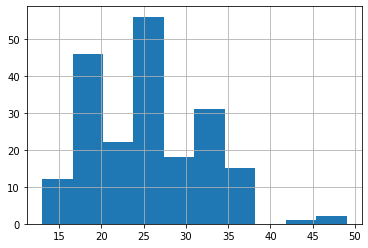

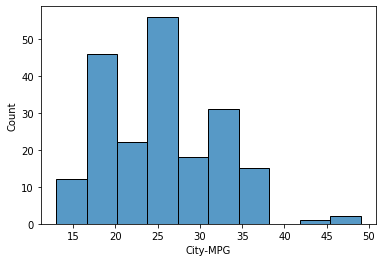

In [176]:
# Using Matplotlib Histogram 

new_df['City-MPG'].hist()
plt.show()

# Using Seaborn Histogram 

sns.histplot(data=new_df, x="City-MPG")
plt.show()

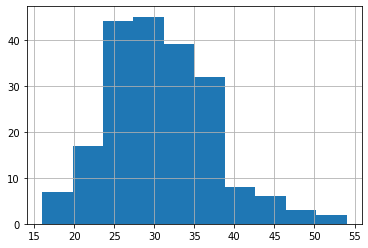

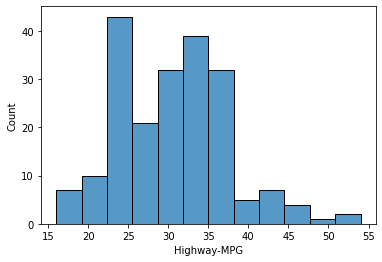

In [177]:
# Using Matplotlib Histogram 

new_df['Highway-MPG'].hist()
plt.show()

# Using Seaborn Histogram 

sns.histplot(data=new_df, x="Highway-MPG")
plt.show()

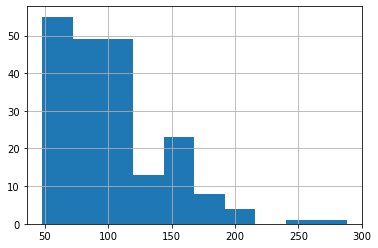

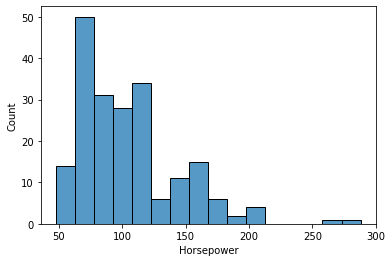

In [179]:
# Using Matplotlib Histogram 

new_df['Horsepower'].hist()
plt.show()

# Using Seaborn Histogram 

sns.histplot(data=new_df, x="Horsepower")
plt.show()

Bar plots:

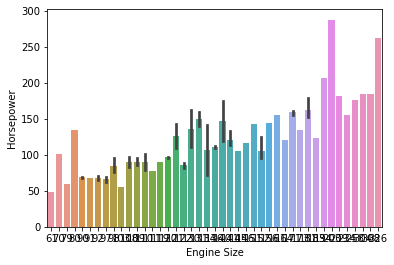

In [148]:
sns.barplot(x = 'Engine Size', y = 'Horsepower', data = new_df)
plt.show()

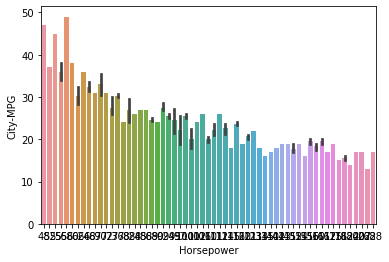

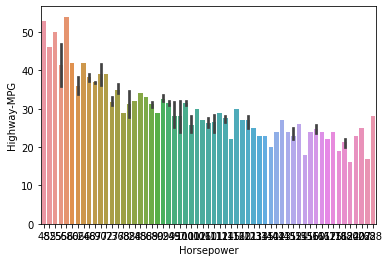

In [175]:
sns.barplot(x = 'Horsepower', y = 'City-MPG', data = new_df)
plt.show()

sns.barplot(x = 'Horsepower', y = 'Highway-MPG', data = new_df)
plt.show()

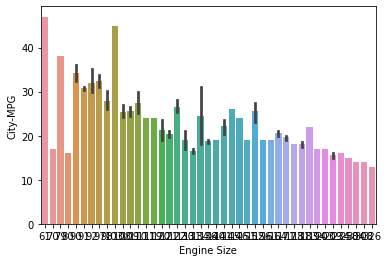

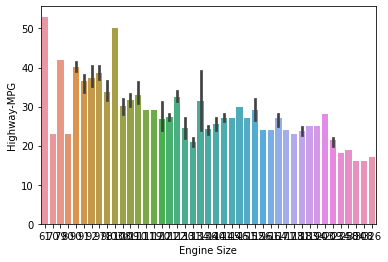

In [174]:
sns.barplot(x = 'Engine Size', y = 'City-MPG', data = new_df)
plt.show()

sns.barplot(x = 'Engine Size', y = 'Highway-MPG', data = new_df)
plt.show()

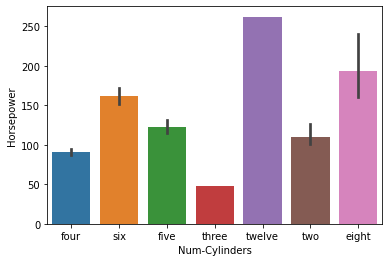

In [150]:
sns.barplot(x = 'Num-Cylinders', y = 'Horsepower', data = new_df)
plt.show()

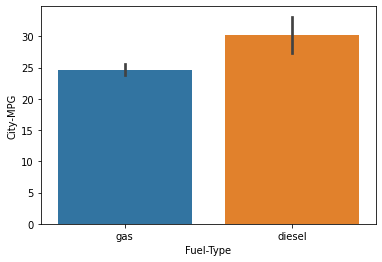

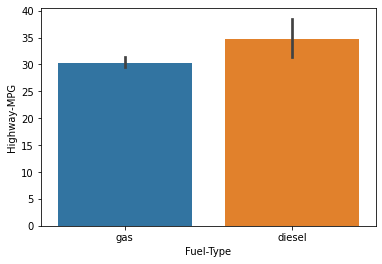

In [159]:
sns.barplot(x = 'Fuel-Type', y = 'City-MPG', data = new_df)
plt.show()

sns.barplot(x = 'Fuel-Type', y = 'Highway-MPG', data = new_df)
plt.show()

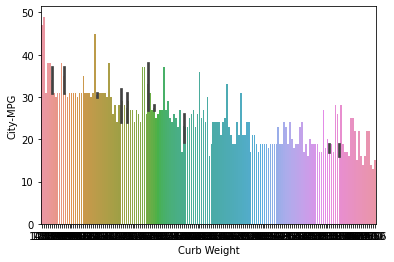

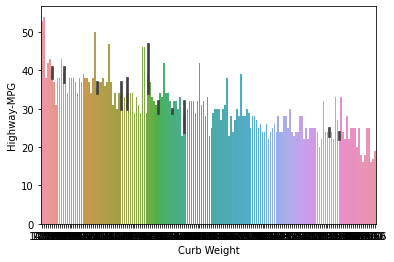

In [173]:
sns.barplot(x = 'Curb Weight', y = 'City-MPG', data = new_df)
plt.show()

sns.barplot(x = 'Curb Weight', y = 'Highway-MPG', data = new_df)
plt.show()

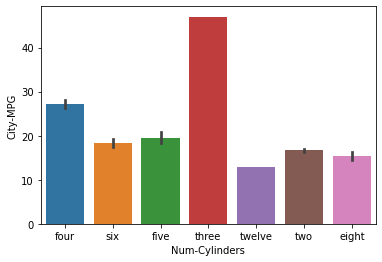

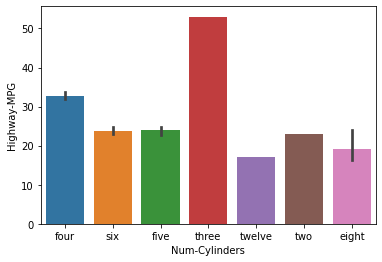

In [172]:
sns.barplot(x = 'Num-Cylinders', y = 'City-MPG', data = new_df)
plt.show()

sns.barplot(x = 'Num-Cylinders', y = 'Highway-MPG', data = new_df)
plt.show()

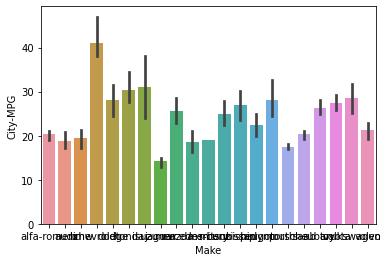

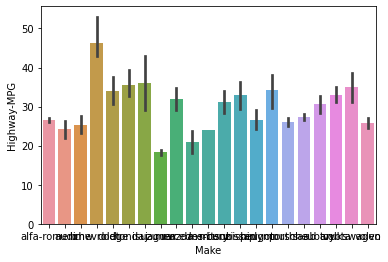

In [186]:
sns.barplot(x = 'Make', y = 'City-MPG', data = new_df)
plt.show()

sns.barplot(x = 'Make', y = 'Highway-MPG', data = new_df)
plt.show()

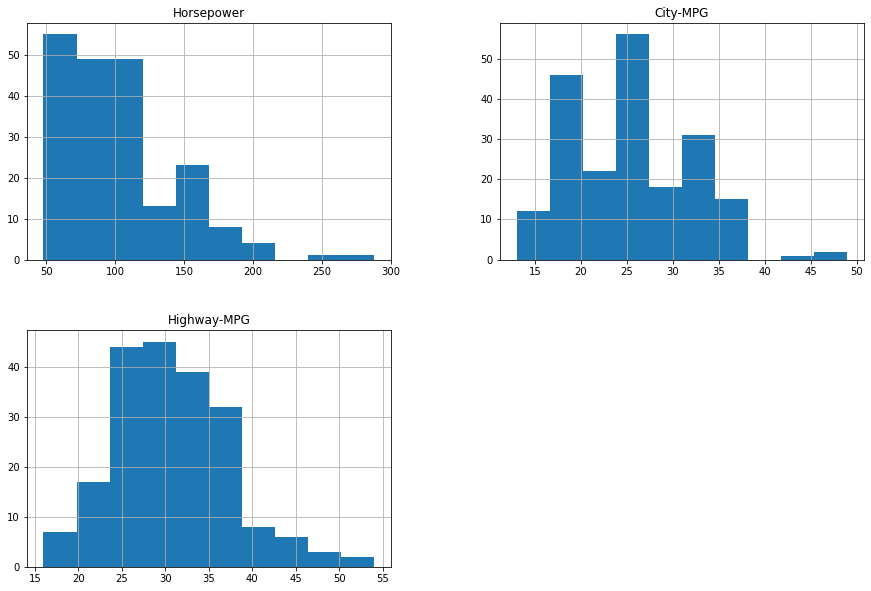

In [182]:
#histograms

numericDataColumns = ['Horsepower', 'City-MPG', 'Highway-MPG']
vals = new_df[numericDataColumns].copy()

vals.hist(bins=10, figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='Horsepower', ylabel='Count'>

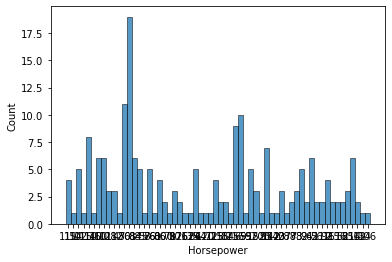

In [183]:
sns.histplot(df['Horsepower'])

<AxesSubplot:xlabel='City-MPG', ylabel='Count'>

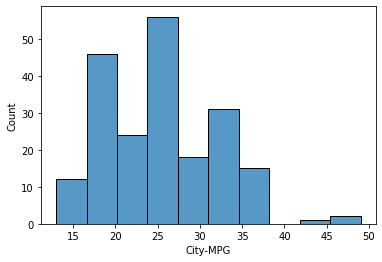

In [184]:
sns.histplot(df['City-MPG'])

<AxesSubplot:xlabel='Highway-MPG', ylabel='Count'>

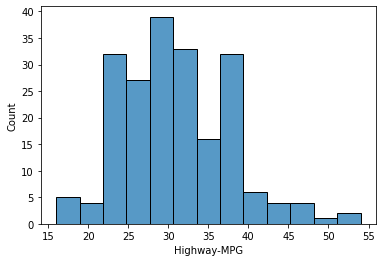

In [185]:
sns.histplot(df['Highway-MPG'])

<AxesSubplot:xlabel='Horsepower', ylabel='City-MPG'>

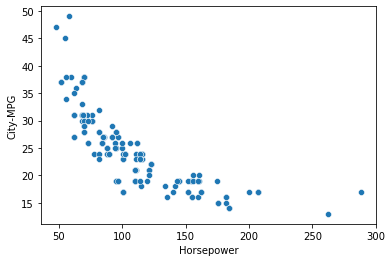

In [189]:
# Scatter plot 

sns.scatterplot(x = 'Horsepower', y ='City-MPG',data =new_df)

<AxesSubplot:xlabel='Horsepower', ylabel='City-MPG'>

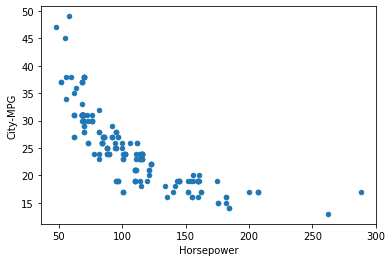

In [190]:
new_df.plot(kind="scatter", x="Horsepower",  y="City-MPG")

### EDA Summary: 


We can certainly assume from the above drawn graphs that, the relationship between automobile gas mileage and horsepower is directly related. Less horsepower more city MPG and viceversa.

Highway MPG also have same relationship like the City MPG has with each of these attributes. 

Weight of the vehicle also have direct relationship with the automobile gas mileage. MPG is less if the curb weight of a vehicle is more. 

Disel vehicles give more mileage per gallon than that of gas vehicles.

The graphs also suggests that number of cylinder and horsepower are also directly related. More number of cylinders, more horsepower. Which is why we can also say based on the analytics that, the cars with more cylinders give less MPG. 

The study also suggests that, the engine size and gas mileage are also directly related. Bigger the engine size gets, we can see that MPG reduces. 

## Section 3: Data Preparation & Feature Engineering

### 1. Which numeric variables contained within the data set appear to require the use of a
feature scaling method for purposes of preparing them for use within a machine learning algorithm?
Be sure to list each relevant variable and explain why you believe each variable that you’ve identified
requires the use of some sort of feature scaling method.


<AxesSubplot:>

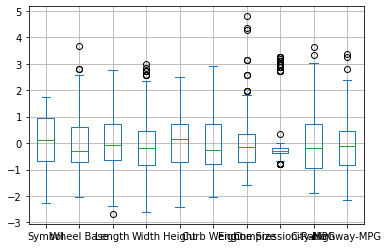

In [192]:
#boxplot to see which variables are how far outside the range of the 

numericDataColumns = ['Symbol', 'Wheel Base', 'Length','Width','Height','Curb Weight','Engine Size', 'Compression-Ratio', 'City-MPG', 'Highway-MPG']
vals = df[numericDataColumns].copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
vals_scaled = scaler.fit_transform(vals)
vals_scaled = pd.DataFrame(vals_scaled, columns=numericDataColumns)

vals_scaled.plot.box(grid='True')

<AxesSubplot:>

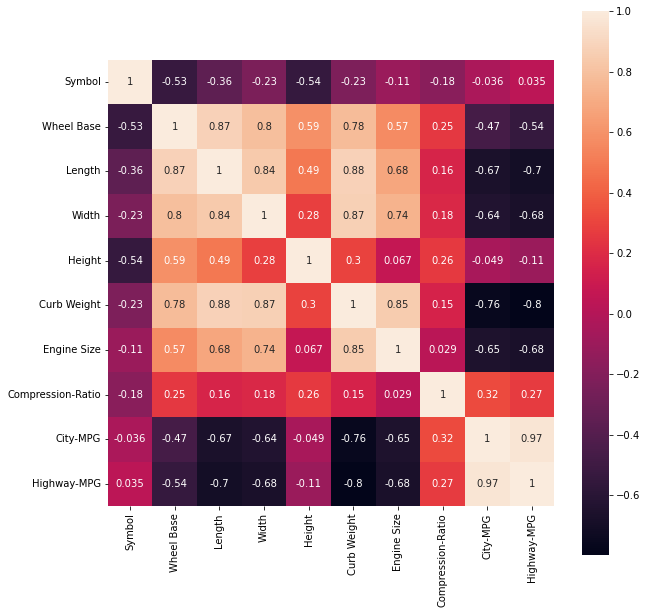

In [331]:
# Correlation Map of our NON-CATEGORICAL DATA
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

After observing the box plot and corelation map of Non-Categorical data, following numeric variables require the use of a feature scaling:

Wheel Base, Length, Width, Engine Size, Compression Ratio, City-MPG and Highway-MPG need feature scaling based on the two graphical representation displayed above.

### 2. Consider the number-of-doors and price variables: Based on your EDA work, how many
missing data values occur within each of these attributes? As we’ve learned, missing data values can
impede the proper functioning of many machine learning algorithms. To address the missing the
number-of-doors and price values, you have been instructed to formulate what you believe will be an
1 effective data imputation approach for purposes of estimating reasonable proxies for the missing data
values. Your supervisor tells you that the affected data observations MUST be retained within the data
set, and that it would be inappropriate to use either a mean, median, or mode value for any of the
missing values since doing so would increase the likelihood of introducing unwarranted bias within the
data set. Describe the imputation method you would employ for each variable. Then, using your
Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics
and commentary that explain your approach as well as the results of your efforts.

In [238]:
#checking for unique values
df['Num Doors'].unique() 

array(['two', 'four', '?'], dtype=object)

In [230]:
# locating the index of '?' character 

df.loc[df['Num Doors']=='?']

,Symbol,Normalized Loss,Make,Fuel-Type,Aspiration,Num Doors,Body Style,Drive-Wheels,Engine Location,Wheel Base,...,Engine Size,Fuel System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-RPM,City-MPG,Highway-MPG,Price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [ ]:
#checking for unique values
df['Price'].unique() 

In [232]:
# locating the index of '?' character 

df.loc[df['Price']=='?']

,Symbol,Normalized Loss,Make,Fuel-Type,Aspiration,Num Doors,Body Style,Drive-Wheels,Engine Location,Wheel Base,...,Engine Size,Fuel System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-RPM,City-MPG,Highway-MPG,Price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


Attributes number-of-doors and price have 2 and 4 missing data values. 

Replacing the missing value "?" with "NaN" value.  And then applying the "back fill" method to fill in those NaN values with the previous values in the column using python library. New df is created to preserve the original data set from potential data change and carrying out the operations. 

In [262]:
#make copy of df, so original data is not impacted

df_replace = df.copy()

# replace ? with nan in the replaced df_replace data
df_replace.replace('?', np.nan, inplace=True)

In [264]:
#replace nan with previous value in the column

df_replace.fillna(method='bfill', inplace=True)


### Graphics on Number-of-Door and Price

In [271]:
# converting the column Price into numeric
df_replace['Price'] = pd.to_numeric(df_replace['Price'])

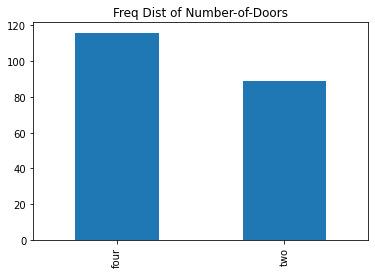

In [275]:
%matplotlib inline

bplt = df_replace['Num Doors'].value_counts().plot.bar(title = "Freq Dist of Number-of-Doors")
bplt;

It appears from the bar plot that the cars with four doors are more in the data set than the cars that have two doors. 

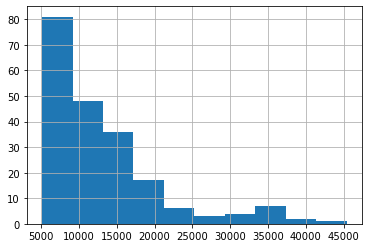

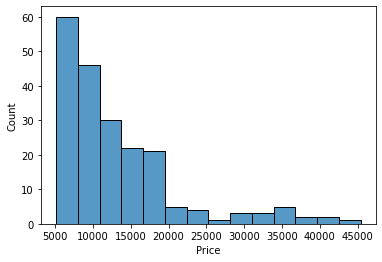

In [274]:
# Using Matplotlib Histogram 

df_replace['Price'].hist()
plt.show()

# Using Seaborn Histogram 

sns.histplot(data=df_replace, x="Price")
plt.show()

The data suggests that more ecpensive cars are far less sold than the cheaper ones. 

### 3. Consider the engine-size and stroke variables: Describe the specific feature scaling method
you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the
original content of these two variables. Next, apply your prescribed feature scaling methods to the two
variables and create histograms and boxplots that show the results of your feature scaling efforts.
Compare your newly created plots against the plots you created for the original content of the
variables. Comment on whether your feature scaling efforts improved the distribution of the data. If
your feature scaling efforts did not improve the distribution of the data, explain why you believe your
efforts were not effective.

### Cleaning data for scaling

In [279]:
# make a copy of original data 
scale_df = df.copy()

It is important to note that the data type of stroke is contineous and engine size is of type contineous. Now it is also important to make sure that they are represented as such in the data set. If they are represented as something other than contineous or numeric, we have to make sure to change them to contineous and numeric. 

In [289]:
# checking data typesof specific columns, Engine Size and Stroke

print(scale_df.dtypes['Engine Size'])
print(scale_df.dtypes['Stroke'])


int64
object


It appears that the data type of Stroke is represented as an object. If we are to analyze these data, we have to make sure that they are compared "apple to apple", meaning both have the same data type. Also, we have the information from UCI that Stroke variable is a contineous variable which should have Numeric representation, so we have to make sure to check and make changes if necessary. 

Making sure that there not any invalid characters, before attempting to change the data types. 

In [290]:
# making sure there are not any invalid or null character
scale_df['Stroke'].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

We notice that there is a "?" character in the data set of column Stroke, we have to replace them with a numeric value. I will be replacing them with a random value between 2.07 to 4.17, as the range of data is not very wide, in the next box.

In [304]:
# stroke: continuous from 2.07 to 4.17, round that to 2 digit after decimal
rand_int = round(np.random.uniform(2.07, 4.17), 2)

scale_df['Stroke'] = df['Stroke'].replace(['?'], rand_int)

Now that we are sure that all the data within the column "Stroke" are numeric, we are changing the column data type to numeric in the next block of code. 

In [305]:
# converting the column Stroke into numeric

scale_df['Stroke'] = pd.to_numeric(scale_df['Stroke'])

The data set in attribute "Stroke" is now ready for further analysis. 

In [292]:
scale_df['Engine Size'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

Data set Engine Size looks fine and also is ready for analysis aswell. 

### Before Feature Scaling

Now, checking for outliers in attributes "Engine Size" and "Stroke". This step is done before we have applied any scaling technique. So that we can compare this plot later with the ones generated after scaling.

<AxesSubplot:>

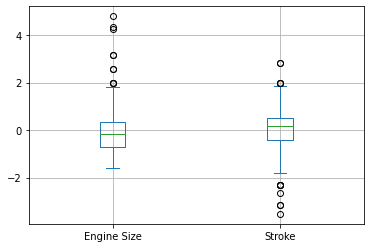

In [307]:
# using box plot to check for outliers, before applying feature scaling technique

numericDataColumns = ['Engine Size', 'Stroke']
value = scale_df[numericDataColumns].copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
value_scaled = scaler.fit_transform(value)
value_scaled = pd.DataFrame(value_scaled, columns=numericDataColumns)

value_scaled.plot.box(grid='True')

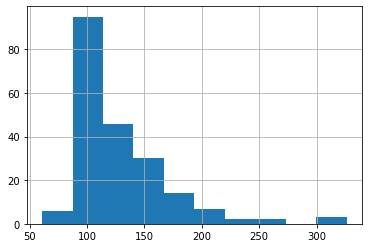

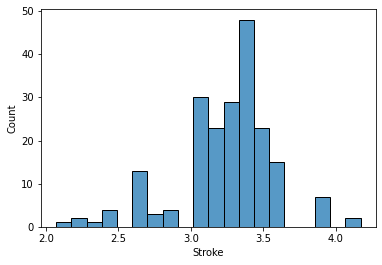

In [308]:
# Using Matplotlib Histogram 

scale_df['Engine Size'].hist()
plt.show()

# Using Seaborn Histogram 

sns.histplot(data=scale_df, x="Stroke")
plt.show()

Based on the histograms and box plot, we can see that there are a lot of outliers on both sides on attribute "Stroke" and attribute "Engine Size" has most of the outliers on the higher end or towards the right. 

### Scaling 

One of the most used scaling technique is Standardization. We will apply this technique and see if there are any improvements. If there are improvments and we are satisfied with the result, we will leave it like that, if not we will try to analyze why are'nt there any improvement. 

Using the data that we just cleaned above, we will make a subset just with the attributes Engine Size and Stroke, and use them to feature scaling with standardization technique. 

In [312]:
# create subset of just the two Engine Size and Stroke, 
std_df = scale_df[['Engine Size', 'Stroke']]
std_df.head()

,Engine Size,Stroke
0,130,2.68
1,130,2.68
2,152,3.47
3,109,3.40
4,136,3.40


In [325]:
# Min-Max Scaling
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# rescaled_features = scaler.fit_transform(std_df)

# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = scaler.fit(std_df)
rescaled_features = scaler.transform(std_df)

In [326]:
#converting numpy array created by MinMaxScaler into Panda Data Frame

rescaled_pd = pd.DataFrame(rescaled_features, columns=['Engine Size', 'Stroke'])
print(rescaled_pd)

     Engine Size    Stroke
0       0.074449 -1.691332
1       0.074449 -1.691332
2       0.604046  0.694239
3      -0.431076  0.482859
4       0.218885  0.482859
..           ...       ...
200     0.339248 -0.272069
201     0.339248 -0.272069
202     1.109571 -1.117587
203     0.435538  0.482859
204     0.339248 -0.272069

[205 rows x 2 columns]


### After Feature Scaling

Now that we have scaled our data, we will examine how that impacts our data set. 

<AxesSubplot:>

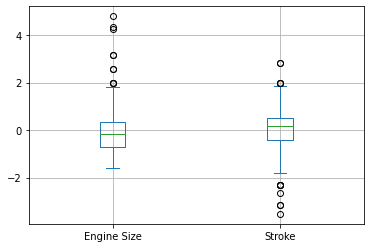

In [327]:
# using box plot to check for outliers, after applying feature scaling technique

numericDataColumns = ['Engine Size', 'Stroke']
val = rescaled_pd[numericDataColumns].copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
val_scaled = scaler.fit_transform(val)
val_scaled = pd.DataFrame(val_scaled, columns=numericDataColumns)

val_scaled.plot.box(grid='True')

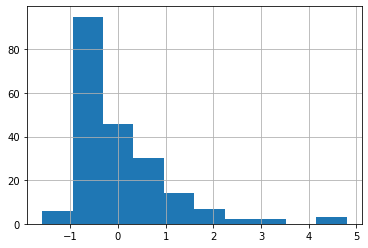

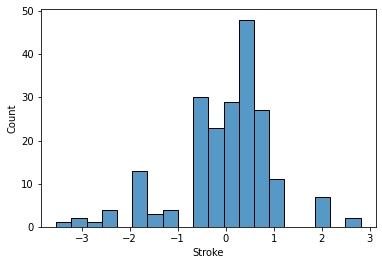

In [328]:
#after scaling data

# Using Matplotlib Histogram 

rescaled_pd['Engine Size'].hist()
plt.show()

# Using Seaborn Histogram 

sns.histplot(data=rescaled_pd, x="Stroke")
plt.show()

<AxesSubplot:>

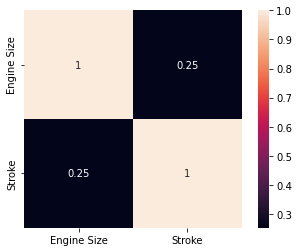

In [333]:
corr = rescaled_pd.corr()
# plt.figure(figsize=(10,10))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

### Conclusion

The result of the rescaled data gave us exactly same distribution as the data before feature scalling did. 

One reason could be that the data that are there before rescaling are within the required distribution range, which means that the rescaling didn't offer any new change to the data.



### 4. Consider the symboling, make, and engine-type variables:


A) For each variable, specify whether its content is numeric/continuous, numeric/discrete,
categorical/nominal, or categorical/ordinal

According to support.minitab.com, "A discrete variable is always numeric. For example, the number of customer complaints or the number of flaws or defects. Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time."

According to saedsaed.com, "A nominal variable has no intrinsic ordering to its categories. For example, gender is a categorical variable having two categories (male and female) with no intrinsic ordering to the categories. An ordinal variable has a clear ordering. For example, temperature as a variable with three orderly categories (low, medium and high)."

* Symboling: numeric discrete
* make: categorical nominal
* engine-type: categorical ordinal

B) For each variable, describe the methodology you would employ for purposes of preparing its data
values for use within a machine learning algorithm.

Most of the times, categorical attributes cannot be used directly into the machine learning algorithms, which is why they require transformation into numerical feature. 

* Symboling is a numerical data, so it can be used directly into machine learning algorithm.

* Make is a categorical data, we have to convert them into some form of numerical data. One way to do so is by using get_dummies. Also can be done using One hot encoding libray which helps us achieve this goal avoiding label encoding.

* Engine-type is also a categorical data, we can do the same that we did for "make" attribute for "engine type" aswell. 

Because its hard to convert the data generated by One Hot Encoding back to pandas, it is suggested to use get_dummies() library.

C) Using your Python skills, apply your prescribed data preparation methodologies to the three
variables. Be sure to show a sample of your results within your Notebook

Using get_dummies library to prepare the data to use in a machine learning algorithm.

In [342]:
#create a sub-category with just the symboling, make and engine type

dummies_df = df[['Symbol','Make', 'Engine Type']]
dummies_df.head()


,Symbol,Make,Engine Type
0,3,alfa-romero,dohc
1,3,alfa-romero,dohc
2,1,alfa-romero,ohcv
3,2,audi,ohc
4,2,audi,ohc


In [341]:
# making dummies 

dummies = pd.get_dummies(dummies_df)
dummies.head()

,Symbol,Make_alfa-romero,Make_audi,Make_bmw,Make_chevrolet,Make_dodge,Make_honda,Make_isuzu,Make_jaguar,Make_mazda,...,Make_toyota,Make_volkswagen,Make_volvo,Engine Type_dohc,Engine Type_dohcv,Engine Type_l,Engine Type_ohc,Engine Type_ohcf,Engine Type_ohcv,Engine Type_rotor
0,3,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


As we can see above, a sample of our categorical data represented into numerical form with the help of get_dummies() library. It will help us use these data into machine learning algorithms. 

5. Consider the wheel-base, length, width, height, curb-weight, engine-size, compression ratio,
horsepower, peak-rpm, and city-mpg variables. Using your dimensionality reduction expertise, use
Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. Be
sure to include appropriate commentary explaining the dimensionality reduction method you have
elected to implement and discuss the results of your efforts. For example, you should explain how
many orthogonal features your approach has generated as well as how much variability is explained by
each of your new features.

Dimensionality reduction helps us reduce the complexity of data without loosing informations. We will be uusing PCA approach for dimentionality reduction of this data. 

In [470]:
# create new subset of data to perform the data cleaning steps

pcs_stored = df[['Wheel Base', 'Length' , 'Width', 'Height', 'Curb Weight', 'Engine Size', 'Compression-Ratio','Horsepower', 'Peak-RPM','City-MPG']]
print(pcs_stored.shape)
print(pcs_stored.head())
print(pcs_stored.info())

new_stored = pcs_stored.copy()


(205, 10)
   Wheel Base  Length  Width  Height  Curb Weight  Engine Size  \
0        88.6   168.8   64.1    48.8         2548          130   
1        88.6   168.8   64.1    48.8         2548          130   
2        94.5   171.2   65.5    52.4         2823          152   
3        99.8   176.6   66.2    54.3         2337          109   
4        99.4   176.6   66.4    54.3         2824          136   

   Compression-Ratio Horsepower Peak-RPM  City-MPG  
0                9.0        111     5000        21  
1                9.0        111     5000        21  
2                9.0        154     5000        19  
3               10.0        102     5500        24  
4                8.0        115     5500        18  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Wheel Base         205 non-null    float64
 1   Length             20

### Preparing data before using dimensionality reduction 

In [471]:
#checking for unique values
# new_stored['Horsepower'].unique() 
new_stored.loc[new_stored['Horsepower']=='?']

,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Compression-Ratio,Horsepower,Peak-RPM,City-MPG
130,96.1,181.5,66.5,55.2,2579,132,8.7,?,?,23
131,96.1,176.8,66.6,50.5,2460,132,8.7,?,?,23


In [472]:
#checking for unique values
# new_stored['Peak-RPM'].unique() 
new_stored.loc[new_stored['Peak-RPM']=='?']

,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Compression-Ratio,Horsepower,Peak-RPM,City-MPG
130,96.1,181.5,66.5,55.2,2579,132,8.7,?,?,23
131,96.1,176.8,66.6,50.5,2460,132,8.7,?,?,23


Replace ? with NaN values in each column. 

In [473]:
# replace ? with nan in the replaced df_replace data
new_stored.replace('?', np.nan, inplace=True)

Since the "?" character are in the same rows in both attributes, I am choosing to drop those rows. Dropping one will also drop the other one, as they are in same rows. 

In [474]:
# making sure that the values are replaces by NaN
print(new_stored['Horsepower'].unique() )
print()
print(new_stored['Peak-RPM'].unique() )

['111' '154' '102' '115' '110' '140' '160' '101' '121' '182' '48' '70'
 '68' '88' '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135'
 '84' '64' '120' '72' '123' '155' '184' '175' '116' '69' '55' '97' '152'
 '200' '95' '142' '143' '207' '288' nan '73' '82' '94' '62' '56' '112'
 '92' '161' '156' '52' '85' '114' '162' '134' '106']

['5000' '5500' '5800' '4250' '5400' '5100' '4800' '6000' '4750' '4650'
 '4200' '4350' '4500' '5200' '4150' '5600' '5900' '5750' nan '5250' '4900'
 '4400' '6600' '5300']


Drop rows with NaN values: 

In [475]:
# convert the columns into numeric

new_stored = new_stored.apply (pd.to_numeric, errors='coerce')

#drop rows that have nan values
new_stored = new_stored.dropna()

print(new_stored)

     Wheel Base  Length  Width  Height  Curb Weight  Engine Size  \
0          88.6   168.8   64.1    48.8         2548          130   
1          88.6   168.8   64.1    48.8         2548          130   
2          94.5   171.2   65.5    52.4         2823          152   
3          99.8   176.6   66.2    54.3         2337          109   
4          99.4   176.6   66.4    54.3         2824          136   
..          ...     ...    ...     ...          ...          ...   
200       109.1   188.8   68.9    55.5         2952          141   
201       109.1   188.8   68.8    55.5         3049          141   
202       109.1   188.8   68.9    55.5         3012          173   
203       109.1   188.8   68.9    55.5         3217          145   
204       109.1   188.8   68.9    55.5         3062          141   

     Compression-Ratio  Horsepower  Peak-RPM  City-MPG  
0                  9.0       111.0    5000.0        21  
1                  9.0       111.0    5000.0        21  
2           

### PCA 

In [476]:

from sklearn.decomposition import PCA
from sklearn import preprocessing

# drop the column we will be looking for 
pca_test = new_stored.drop('City-MPG', 1)

#normalize data
new_stored = pd.DataFrame(preprocessing.scale(pca_test), columns=pca_test.columns)

# do PCA
pca = PCA(n_components=len(new_stored.columns))
x_new = pca.fit_transform(new_stored)
x_new = pd.DataFrame(x_new)


In [477]:
print(x_new)

            0         1         2         3         4         5         6  \
0   -1.490252  1.338826  1.706358 -0.475079 -0.073052 -0.139529 -0.758153   
1   -1.490252  1.338826  1.706358 -0.475079 -0.073052 -0.139529 -0.758153   
2    0.290870  1.200658  0.866588 -0.439037  0.748179  0.226815 -0.335247   
3   -0.231670  0.069483 -0.749133  0.596217 -0.188814  0.071216  0.000106   
4    0.481889  0.738952 -0.703727  0.203548  0.113035 -0.051584  0.039598   
..        ...       ...       ...       ...       ...       ...       ...   
198  2.321113 -0.015684 -1.244652  0.550193 -0.775059 -0.068747  0.289899   
199  2.752989  0.555376 -1.099008  0.317133 -0.323485  0.257847 -0.082423   
200  2.765996  0.602044 -1.148136  0.470841 -0.336980 -0.273802  0.576864   
201  3.036543 -2.294085  1.046724  1.949341 -0.203718 -0.153320 -0.044381   
202  2.412255  0.005129 -1.231329  0.556132 -0.760166 -0.085749  0.231031   

            7         8  
0    0.442208  0.267373  
1    0.442208  0.267373

In [478]:
print("Explain Variance: ", pca.explained_variance_ratio_)

Explain Variance:  [0.54838843 0.21013875 0.09938355 0.06433052 0.03390295 0.01489745
 0.01391188 0.00842283 0.00662363]


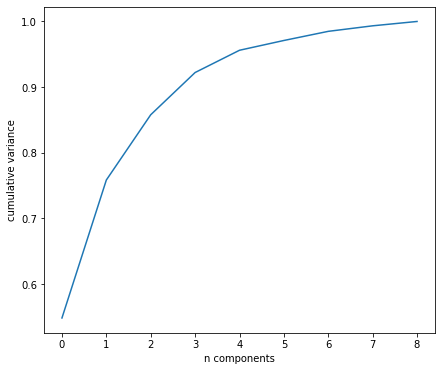

In [483]:
plt.figure(figsize=(7, 6))

#plot the variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

We are not exactly sure which data points are making the difference in this plot. However we can see that almonst 5 components explain the 90% of the data

We will transform those data again and keep the 5 for the regression. 

### PDA Again

In [484]:
pca = PCA(n_components=5)
# choose the same set of data, with reduced components
x_new = pca.fit_transform(new_stored)
x_new = pd.DataFrame(x_new)

In [485]:
print(x_new)

            0         1         2         3         4
0   -1.490252  1.338826  1.706358 -0.475079 -0.073052
1   -1.490252  1.338826  1.706358 -0.475079 -0.073052
2    0.290870  1.200658  0.866588 -0.439037  0.748179
3   -0.231670  0.069483 -0.749133  0.596217 -0.188814
4    0.481889  0.738952 -0.703727  0.203548  0.113035
..        ...       ...       ...       ...       ...
198  2.321113 -0.015684 -1.244652  0.550193 -0.775059
199  2.752989  0.555376 -1.099008  0.317133 -0.323485
200  2.765996  0.602044 -1.148136  0.470841 -0.336980
201  3.036543 -2.294085  1.046724  1.949341 -0.203718
202  2.412255  0.005129 -1.231329  0.556132 -0.760166

[203 rows x 5 columns]


Ploting the data again:

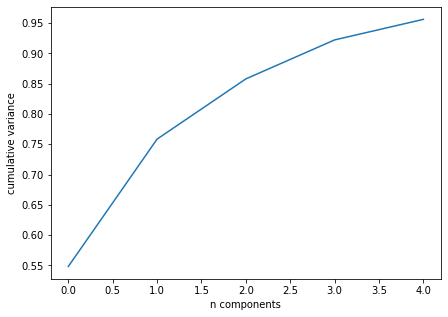

In [488]:
plt.figure(figsize=(7, 5))

#plot the variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

As we can see, our approach of dimentionality reduction approach gave us a more balance distributed graph. Our attributes are reduced to 5 from 9 and that covers about 90% of the data. 